In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Load the data
train = pd.read_csv("Housing_dataset_train.csv")
test = pd.read_csv("Housing_dataset_test.csv")
submission = pd.read_csv("Sample_submission.csv")

In [3]:
train.shape

(14000, 7)

In [4]:
test.shape

(6000, 6)

In [5]:
train.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [6]:
train.describe(include = "all")

,ID,loc,title,bedroom,bathroom,parking_space,price
count,14000.000000,12187,12278,12201.000000,12195.000000,12189.000000,1.400000e+04
unique,NaN,36,10,NaN,NaN,NaN,NaN
top,NaN,Kaduna,Flat,NaN,NaN,NaN,NaN
freq,NaN,370,1372,NaN,NaN,NaN,NaN
mean,4862.700357,NaN,NaN,4.308171,3.134235,3.169825,2.138082e+06
std,3818.348214,NaN,NaN,2.441165,2.035950,1.599415,1.083057e+06
min,0.000000,NaN,NaN,1.000000,1.000000,1.000000,4.319673e+05
25%,1672.750000,NaN,NaN,2.000000,1.000000,2.000000,1.393990e+06
50%,3527.000000,NaN,NaN,4.000000,2.000000,3.000000,1.895223e+06
75%,8011.250000,NaN,NaN,6.000000,5.000000,4.000000,2.586699e+06


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             6000 non-null   int64 
 1   loc            6000 non-null   object
 2   title          6000 non-null   object
 3   bedroom        6000 non-null   int64 
 4   bathroom       6000 non-null   int64 
 5   parking_space  6000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 281.4+ KB


In [9]:
test.head()

,ID,loc,title,bedroom,bathroom,parking_space
0,845,Kano,Penthouse,4,1,2
1,1924,Adamawa,Apartment,2,2,4
2,10718,Adamawa,Bungalow,2,7,2
3,12076,Lagos,Mansion,9,5,2
4,12254,Gombe,Semi-detached duplex,5,6,1


In [10]:
test.describe(include = "all")

,ID,loc,title,bedroom,bathroom,parking_space
count,6000.000000,6000,6000,6000.000000,6000.000000,6000.000000
unique,NaN,36,10,NaN,NaN,NaN
top,NaN,Benue,Mansion,NaN,NaN,NaN
freq,NaN,188,673,NaN,NaN,NaN
mean,4818.699167,NaN,NaN,4.329833,3.105667,3.132333
std,3832.336902,NaN,NaN,2.454733,2.033189,1.604551
min,2.000000,NaN,NaN,1.000000,1.000000,1.000000
25%,1647.000000,NaN,NaN,2.000000,1.000000,2.000000
50%,3433.000000,NaN,NaN,4.000000,2.000000,3.000000
75%,7970.000000,NaN,NaN,6.000000,5.000000,4.000000


In [11]:
#Percentage of Missing Values
cols = train.columns
cols
for i in cols:
    print("{} has {}% missing values". format(i, round(train[i].isnull().sum()/len(train) * 100, 2)))
    print('*' * 60)

ID has 0.0% missing values
************************************************************
loc has 12.95% missing values
************************************************************
title has 12.3% missing values
************************************************************
bedroom has 12.85% missing values
************************************************************
bathroom has 12.89% missing values
************************************************************
parking_space has 12.94% missing values
************************************************************
price has 0.0% missing values
************************************************************


The raw data will be analysed before filling the missing values.Imputing missing values might affect the EDA process

In [12]:
train.drop("ID", axis = 1, inplace = True)

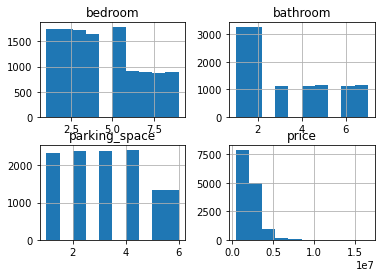

In [13]:
train.hist();

In [14]:
train["title"].value_counts()

Flat                    1372
Apartment               1331
Townhouse               1327
Mansion                 1322
Detached duplex         1312
Penthouse               1306
Semi-detached duplex    1299
Bungalow                1293
Terrace duplex          1266
Cottage                  450
Name: title, dtype: int64

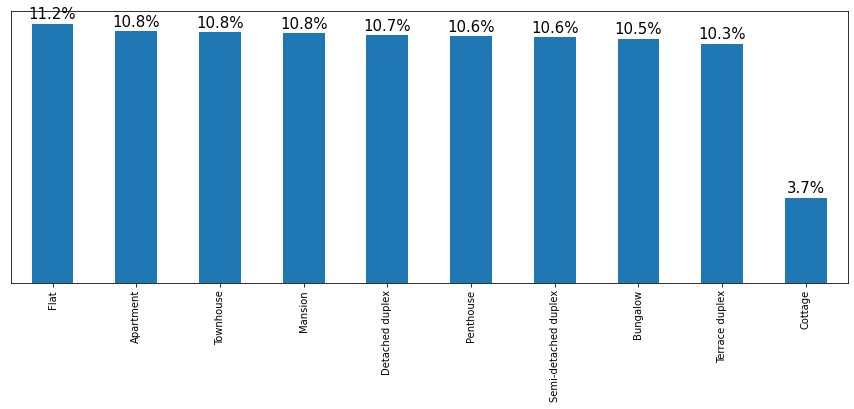

In [15]:
#title feature analysis
fig = plt.figure(figsize=(15,5))
plt.xticks(rotation=90, ha='center')

ax = train["title"].value_counts(normalize=True).mul(100).plot.bar()
for p in ax.patches:
    y = p.get_height()
    x = p.get_x() + p.get_width() / 2
    
    # Label of bar height
    label = "{:.1f}%".format(y)

    # Annotate plot
    ax.annotate(label, xy=(x, y), xytext=(0, 5), textcoords="offset points", ha="center", fontsize=15)

# Remove y axis
ax.get_yaxis().set_visible(False)

#we have more flats

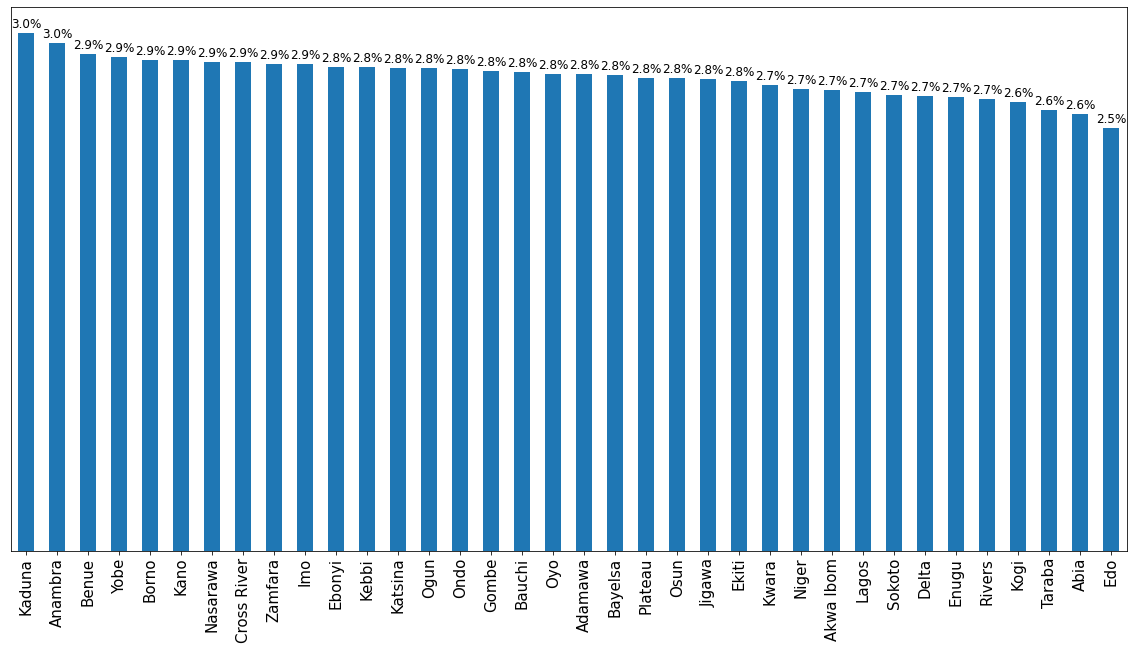

In [16]:
#loc feature analysis
fig = plt.figure(figsize=(20,10))
plt.xticks(rotation=90, ha='center', size = 15)
ax = train["loc"].value_counts(normalize=True).mul(100).plot.bar()
for p in ax.patches:
    y = p.get_height()
    x = p.get_x() + p.get_width() / 2

    # Label of bar height
    label = "{:.1f}%".format(y)

    # Annotate plot
    ax.annotate(label, xy=(x, y), xytext=(0, 5), textcoords="offset points", ha="center", fontsize=12)

# Remove y axis
ax.get_yaxis().set_visible(False)

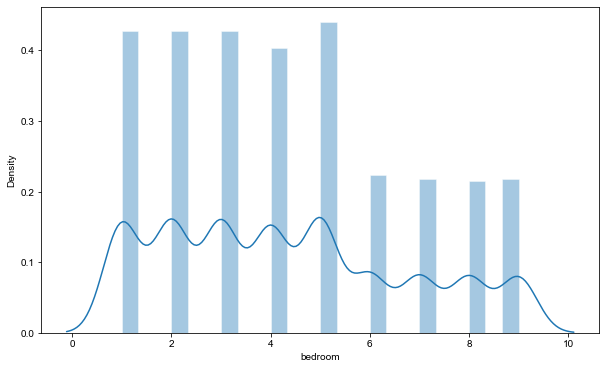

In [17]:
fig = plt.figure(figsize=(10,6))
plt.xlabel("bedroom")
sns.set(rc={"axes.labelsize": 30})
sns.distplot(train["bedroom"]);

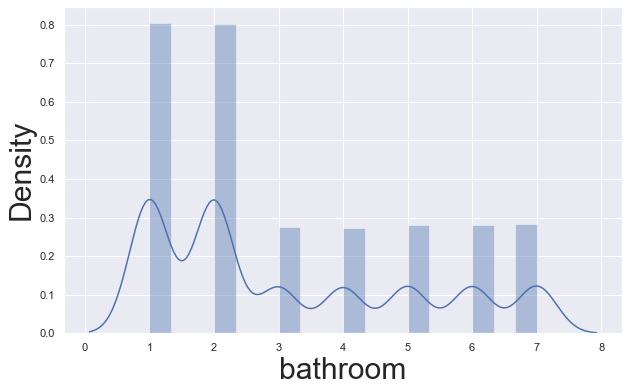

In [18]:
fig = plt.figure(figsize=(10,6))
plt.xlabel("bathroom")
sns.set(rc={"axes.labelsize": 30})
sns.distplot(train["bathroom"]);

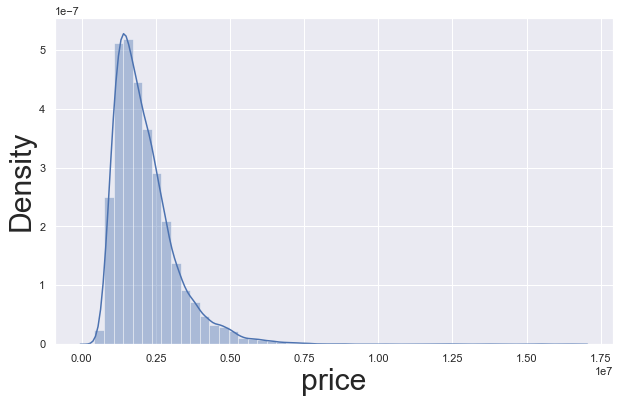

In [19]:
fig = plt.figure(figsize=(10,6))
plt.xlabel("price")
sns.set(rc={"axes.labelsize": 30})
sns.distplot(train["price"]);

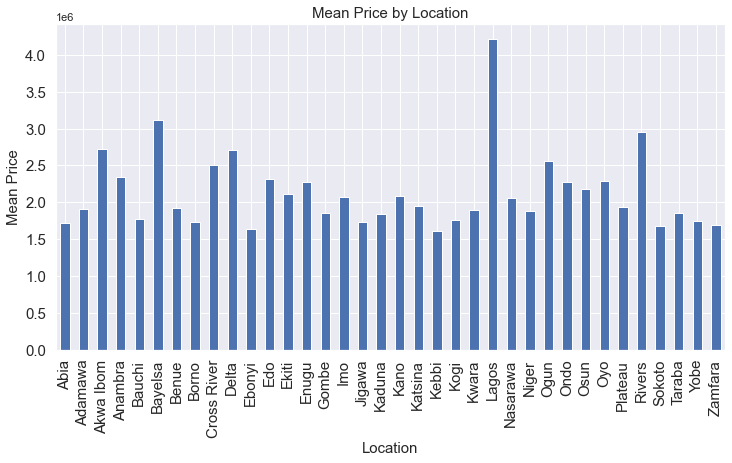

In [20]:
price_location = train.groupby('loc')['price'].mean()

# Plotting the bar chart for price distribution by location
plt.figure(figsize=(12, 6))
price_location.plot(kind='bar')
plt.xticks(rotation=90, ha='center', size = 15)
plt.yticks (size = 15)
plt.xlabel('Location', size = 15)
plt.ylabel('Mean Price', size = 15)
plt.title('Mean Price by Location', size =15)
plt.show()

#On an average Lagos has the highest house price

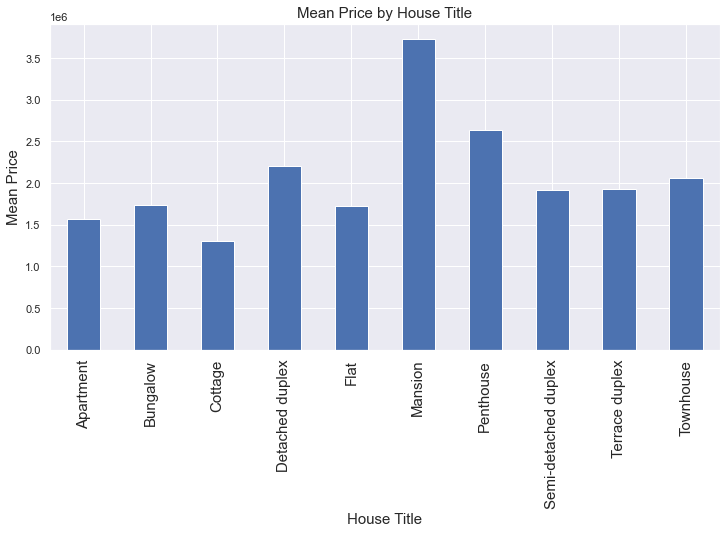

In [21]:
price_title = train.groupby('title')['price'].mean()

# Plotting the bar chart for price distribution by title
plt.figure(figsize=(12, 6))
price_title.plot(kind='bar')
plt.xticks(rotation=90, ha='center', size = 15)
plt.xlabel('House Title', size = 15)
plt.ylabel('Mean Price', size = 15)
plt.title('Mean Price by House Title', size =15)
plt.show()

#On the average, mansion has the highest price

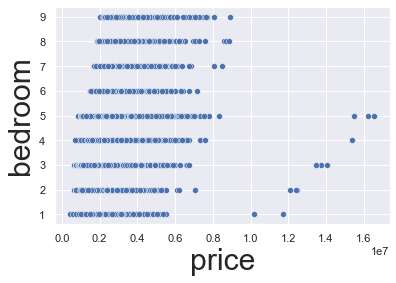

In [22]:
sns.scatterplot(x = train["price"], y = train["bedroom"]);

<AxesSubplot:xlabel='price', ylabel='bathroom'>

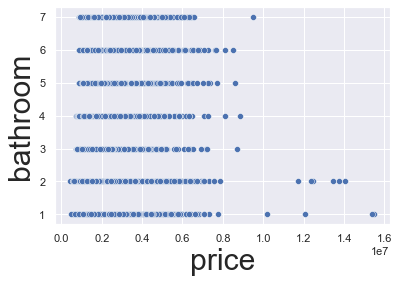

In [23]:
sns.scatterplot(x = train["price"], y = train["bathroom"])

Text(0, 0.5, 'price')

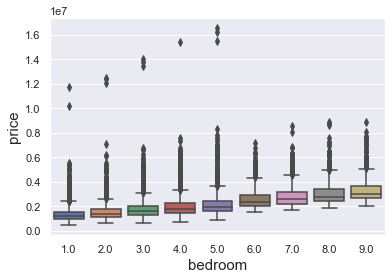

In [25]:
sns.boxplot(x = train["bedroom"], y = train["price"]);
plt.xlabel("bedroom", size=15)
plt.ylabel("price", size=15)

Text(0, 0.5, 'price')

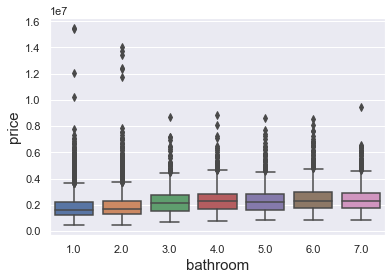

In [26]:
sns.boxplot(x = train["bathroom"], y = train["price"]);
plt.xlabel("bathroom", size=15)
plt.ylabel("price", size=15)

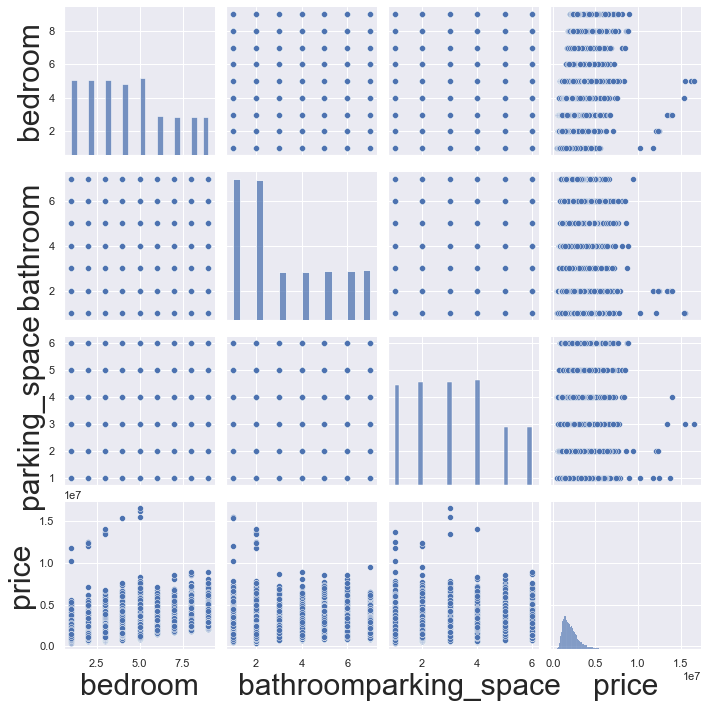

In [27]:
sns.pairplot(train)
#plt.ylabel("", size = 8)

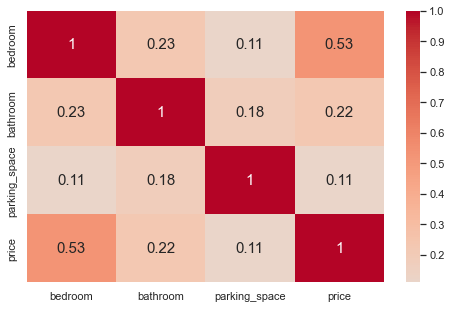

In [28]:
#correlation matrix
plt.figure(figsize=(8, 5))
corr_matrix = train.corr()

heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', 
                      center=0, annot_kws={"size": 15})

plt.show()
